# Fingerprint classification

In [1]:
import os

In [2]:
import numpy  as np
y_train=[]

In [3]:
list=[]
for root, dirs, files in os.walk(r'C:\Users\win10\Documents\Datasets\NISTSpecialDatabase4GrayScaleImagesofFIGS\sd04\png_txt'):
    for  folder in dirs:
        for item in os.listdir(os.path.join(root,folder)):
            list.append(os.path.join(root,folder,item))

In [4]:
for i in os.listdir(r'C:\Users\win10\Documents\Datasets\Dataset\Train'):
    for item in list:
        if item[-3:]=='txt':
            if item[-12:-4]==i[:-4]:
                with open(item, "r") as text_file:
                    data = text_file.readlines()
                    if data[1][7:8]=='W':
                        y_train.append(0)
                    if data[1][7:8]=='R':
                        y_train.append(1)
                    if data[1][7:8]=='L':
                        y_train.append(2)
                    if data[1][7:8]=='A':
                        y_train.append(3)
                    if data[1][7:8]=='T':
                        y_train.append(4)

In [5]:
for i in os.listdir(r'C:\Users\win10\Documents\Datasets\Dataset\Test'):
    for item in list:
        if item[-3:]=='txt':
            if item[-12:-4]==i[:-4]:
                with open(item, "r") as text_file:
                    data = text_file.readlines()
                    if data[1][7:8]=='W':
                        y_train.append(0)
                    if data[1][7:8]=='R':
                        y_train.append(1)
                    if data[1][7:8]=='L':
                        y_train.append(2)
                    if data[1][7:8]=='A':
                        y_train.append(3)
                    if data[1][7:8]=='T':
                        y_train.append(4)

In [6]:
len(y_train)

4000

In [7]:
train_images=[]

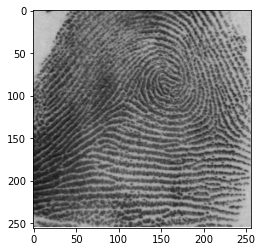

In [8]:
import matplotlib.pyplot as plt
import cv2
plt.imshow(cv2.resize(cv2.imread(os.path.join(r'C:\Users\win10\Documents\Datasets\Dataset\Train','f0001_01.png'))[60:-30,:,:],(256,256)))

In [9]:
for i in os.listdir(r'C:\Users\win10\Documents\Datasets\Dataset\Train'):
    train_images.append(cv2.resize(cv2.imread(os.path.join(r'C:\Users\win10\Documents\Datasets\Dataset\Train',i))[60:-30,:,:],(256,256)))

In [10]:
for i in os.listdir(r'C:\Users\win10\Documents\Datasets\Dataset\Test'):
    train_images.append(cv2.resize(cv2.imread(os.path.join(r'C:\Users\win10\Documents\Datasets\Dataset\Test',i))[60:-30,:,:],(256,256)))

In [11]:
train_images=np.array(train_images)
train_images.shape

(4000, 256, 256, 3)

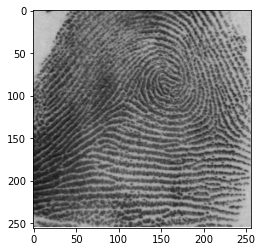

In [12]:
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.show()

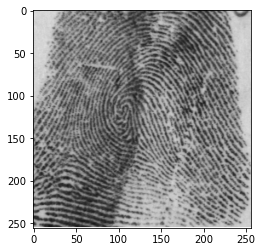

In [13]:
plt.imshow(train_images[500], cmap=plt.cm.binary)
plt.show()

In [14]:
print(type(train_images))
print(train_images.shape)

<class 'numpy.ndarray'>
(4000, 256, 256, 3)


In [15]:
y_train=np.array(y_train)

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

In [17]:
image_dim=train_images.shape
print(image_dim)
y_train=np.expand_dims(y_train, axis=-1)
print(y_train.shape)

(4000, 256, 256, 3)
(4000, 1)


In [18]:
y_train = keras.utils.to_categorical(y_train, 5)

In [19]:
print(train_images.shape)

(4000, 256, 256, 3)


In [20]:
model = keras.Sequential(
    [
        layers.Conv2D(32, input_shape=(256,256,3),padding="same",kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), padding="same",activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), padding="same",activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3),padding="same",activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3),padding="same",activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3),padding="same",activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3),padding="same",activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.5),
        layers.Conv2D(196, kernel_size=(3, 3),padding="same",activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(5, activation="softmax",kernel_regularizer='l1_l2'),
    ]
)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        3

In [21]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

history=model.fit(x=train_images, y=y_train, batch_size=64, epochs=40, validation_split=0.025)

Epoch 1/40
61/61 [==============================] - 12s 202ms/step - loss: 2.7133 - accuracy: 0.2146 - val_loss: 2.4163 - val_accuracy: 0.2100
Epoch 2/40
61/61 [==============================] - 10s 169ms/step - loss: 2.3447 - accuracy: 0.2221 - val_loss: 2.2631 - val_accuracy: 0.1800
Epoch 3/40
61/61 [==============================] - 10s 169ms/step - loss: 2.1817 - accuracy: 0.2362 - val_loss: 2.1030 - val_accuracy: 0.2300
Epoch 4/40
61/61 [==============================] - 10s 169ms/step - loss: 1.9427 - accuracy: 0.3246 - val_loss: 1.5155 - val_accuracy: 0.4900
Epoch 5/40
61/61 [==============================] - 10s 169ms/step - loss: 1.4354 - accuracy: 0.5395 - val_loss: 1.1504 - val_accuracy: 0.6400
Epoch 6/40
61/61 [==============================] - 10s 170ms/step - loss: 1.1404 - accuracy: 0.6369 - val_loss: 0.9773 - val_accuracy: 0.7100
Epoch 7/40
61/61 [==============================] - 10s 170ms/step - loss: 0.9230 - accuracy: 0.7203 - val_loss: 0.6593 - val_accuracy: 0.7900

In [22]:
test_img=cv2.resize(cv2.imread(r'C:\Users\win10\Downloads\download.jpg'),(256,256))

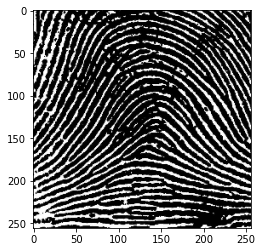

In [23]:
plt.imshow(test_img)

In [24]:
test_img=np.reshape(test_img[:,:,:],(1,256,256,3))

In [25]:
test_img.shape

(1, 256, 256, 3)

In [26]:
model.predict(test_img)

array([[4.7643265e-32, 1.8706054e-31, 7.2122187e-30, 1.0000000e+00,
        4.5985523e-30]], dtype=float32)

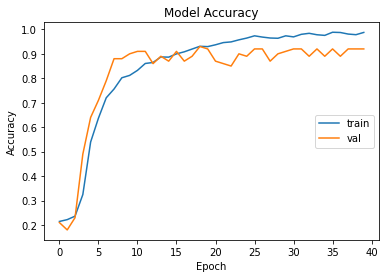

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='center right')
plt.show()

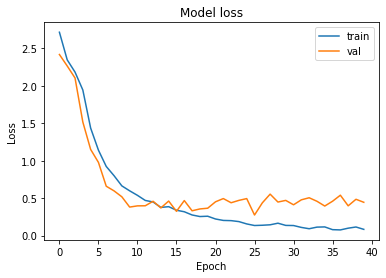

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

# 